# Linear regression with one variable

`Regression` refers to a set of methods for modeling the relationship between data points x and corresponding real-valued targets y. <br>
In the natural sciences and social sciences, the purpose of regression is most often to characterize the relationship between the inputs and outputs. 
Machine learning, on the other hand, is most often concerned with prediction.
Regression problems pop up whenever we want to predict a numerical value. Common examples include predicting prices (of homes, stocks, etc.), predicting length of stay (for patients in the hospital), demand forecasting (for retail sales), among countless others. 
Not every prediction problem is a classic regression problem.

In [20]:
#import libarey files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Salary_Data.csv')

X = dataset.iloc[:, :-1].values #get array of dataset in column 1st
y = dataset.iloc[:, 1].values #get a copy of dataset exclude last column

Code explanation:
test_size=1/3: we will split our dataset (30 observations) into 2 parts (training set, test set) and the ratio of test set compare to dataset is 1/3 (10 observations will be put into the test set. You can put it 1/2 to get 50% or 0.5, they are the same. We should not let the test set too big; if it’s too big, we will lack of data to train. Normally, we should pick around 5% to 30%.
train_size: if we use the test_size already, the rest of data will automatically be assigned to train_size.
random_state: this is the seed for the random number generator. We can put an instance of the RandomState class as well. If we leave it blank or 0, the RandomState instance used by np.random will be used instead.

In [4]:
# Splitting the dataset into the Training set and Test set
# to split the dataset import from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

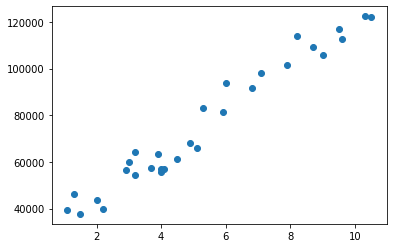

In [5]:
plt.scatter(X,y)

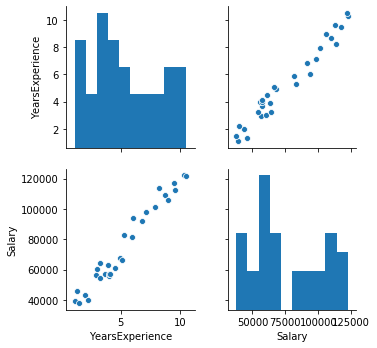

In [27]:
sns.pairplot(dataset)

In [6]:
# Fitting Simple Linear Regression to the Training set
# Import Linear regression from sklearn.linear_model machine learning module
from sklearn.linear_model import LinearRegression
#create regression object for our training model which will implement the Linear Regression.
regressor = LinearRegression()
#regressor.fit: in this line, we pass the X_train which contains value of Year Experience and y_train which contains values of particular Salary to form up the model. This is the training process.
regressor.fit(X_train, y_train)

#Predicting the Test set results
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Salary')

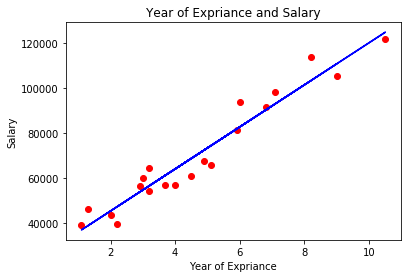

In [7]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'r')
plt.plot(X_train, regressor.predict(X_train), color = 'b')
plt.title("Year of Expriance and Salary")
plt.xlabel("Year of Expriance")
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

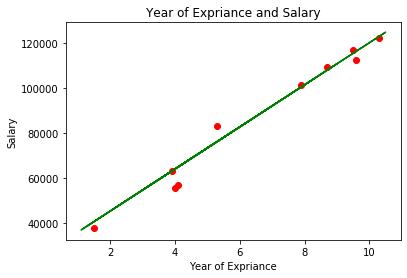

In [8]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_train, regressor.predict(X_train), color = 'g')
plt.title("Year of Expriance and Salary")
plt.xlabel("Year of Expriance")
plt.ylabel('Salary')

In [9]:
# Predicting the result of 5 Years Experience
#y_pred = regressor.predict(5)
#print(y_pred)

In [10]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [11]:
import os
print(os.listdir(".."))

['Lab_1', 'Simple_Linear_Regression', 'ML_Lab_1']


### Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [12]:
# print the intercept
print(regressor.intercept_)

26816.19224403119


## Predictions from our Model¶
Let's grab predictions off our test set and see how well it did!

In [17]:
y_pred = regressor.predict(X_test)

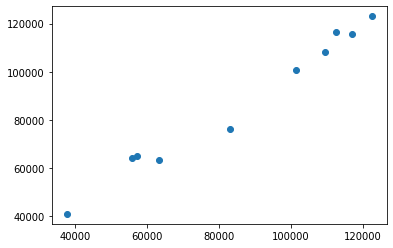

In [18]:
plt.scatter(y_test,y_pred)

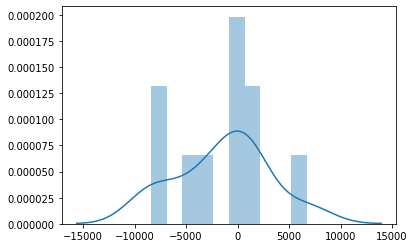

In [23]:
sns.distplot((y_test-y_pred),bins=10);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3426.4269374307123
MSE: 21026037.329511296
RMSE: 4585.4157204675885


## This was your first real Machine Learning Project!
# Great Job!